<a href="https://colab.research.google.com/github/pszachew/Delivery-Prediction/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
deliveries = pd.read_json('https://raw.githubusercontent.com/pszachew/Delivery-Prediction/master/data/deliveries.jsonl', lines=True)

In [ ]:
sessions = pd.read_json('https://raw.githubusercontent.com/pszachew/Delivery-Prediction/master/data/sessions.jsonl', lines=True)

In [ ]:
products = pd.read_json('https://raw.githubusercontent.com/pszachew/Delivery-Prediction/master/data/products.jsonl', lines=True)

In [ ]:
users = pd.read_json('https://raw.githubusercontent.com/pszachew/Delivery-Prediction/master/data/users.jsonl', lines=True)

In [ ]:
deliveries.head()

,purchase_id,purchase_timestamp,delivery_timestamp,delivery_company
0,20001,2021-03-13T15:20:42,2021-03-15T09:02:35.781897,516
1,20002,2021-07-05T05:38:05,2021-07-06T13:03:11.690276,516
2,20003,2021-08-10T02:55:17,2021-08-12T08:10:38.305541,620
3,20004,2021-06-11T17:55:59,2021-06-14T08:25:06.664179,620
4,20005,2021-05-12T17:45:11,2021-05-15T09:13:13.350646,620


In [ ]:
sessions.head()

,session_id,timestamp,user_id,product_id,event_type,offered_discount,purchase_id
0,124,2021-03-13 15:14:51,102,1035,VIEW_PRODUCT,5,NaN
1,124,2021-03-13 15:16:00,102,1067,VIEW_PRODUCT,5,NaN
2,124,2021-03-13 15:20:42,102,1067,BUY_PRODUCT,5,20001.0
3,125,2021-01-30 15:58:37,102,1067,VIEW_PRODUCT,0,NaN
4,126,2021-07-05 05:36:36,102,1001,VIEW_PRODUCT,0,NaN


In [ ]:
products.head()

,product_id,product_name,category_path,price
0,1001,Telefon Siemens Gigaset DA310,Telefony i akcesoria;Telefony stacjonarne,58.97
1,1002,Kyocera FS-1135MFP,Komputery;Drukarki i skanery;Biurowe urządzeni...,2048.50
2,1003,Kyocera FS-3640MFP,Komputery;Drukarki i skanery;Biurowe urządzeni...,7639.00
3,1004,Fallout 3 (Xbox 360),Gry i konsole;Gry na konsole;Gry Xbox 360,49.99
4,1005,Szalone Króliki Na żywo i w kolorze (Xbox 360),Gry i konsole;Gry na konsole;Gry Xbox 360,49.99


In [ ]:
users.head()

,user_id,name,city,street
0,102,Przemysław Hinca,Poznań,ul. Jana Sobieskiego 052
1,103,Alex Majnusz,Radom,ulica Krzywa 589
2,104,Dominik Jeske,Gdynia,pl. Zwycięstwa 75/14
3,105,Kaja Pielka,Wrocław,ul. Kusocińskiego 80
4,106,Marika Budzich,Wrocław,aleja Borowa 77


In [19]:
pd.to_datetime(deliveries['delivery_timestamp'][0]).year

2021

In [22]:
deliveries['delivery_timestamp'] = deliveries['delivery_timestamp'].apply(lambda x: pd.to_datetime(x))
deliveries['purchase_timestamp'] = deliveries['purchase_timestamp'].apply(lambda x: pd.to_datetime(x))

In [52]:
deliveries['diff_date'] = deliveries['delivery_timestamp'] - deliveries['purchase_timestamp']
deliveries['diff_date'] = deliveries['diff_date'].apply(lambda x: (x.total_seconds()/(60*60*24)))

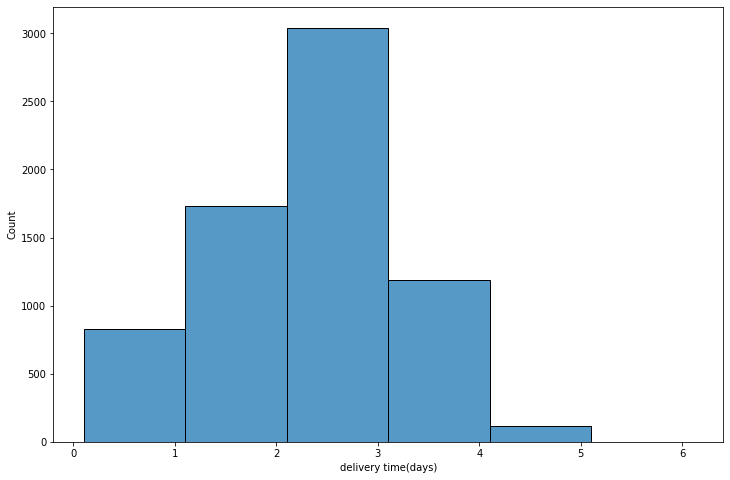

In [56]:
plt.figure(figsize=(12,8))
sns.histplot(data=deliveries, x='diff_date', binwidth=1)
plt.xlabel("delivery time(days)")
plt.show()